# Discrete Fourier Transform (DFT)
Here we implement DFT directly by its formula, we use the diferent variants:


1. 2 loops DFT
2. 1 loop DFT
3. DFT obtained by matrix multiplication



In [1]:
# Importing libraries
import numpy as np   

import matplotlib
from matplotlib import pyplot as plt

from scipy.linalg import dft # used to obtainf dft matrix
from scipy.fft import fft # used to get the fft 

from time import process_time # will be used for determine execution time

## Create a signal as a sum of sinusoids

The signal have frequency componets 1, 3, 5, 7 and 9 Hz

In [2]:
f = 1; # frequency in hz of the first harmonic
fs = 1000; # sample frequency, 1 ksamples x second
ts = 1/fs

TSim = 1 # simulation time: 1 second
t = np.arange(0,TSim,ts)
pi = np.pi
arg = 2*pi*f*t;

Harm = np.arange(1,10,2)
kAmp = 1/Harm;

S = 0
for i in range(len(Harm)):
  x = np.sin(2*pi*Harm[i]*t)
  S = S + 4/pi*kAmp[i]*x

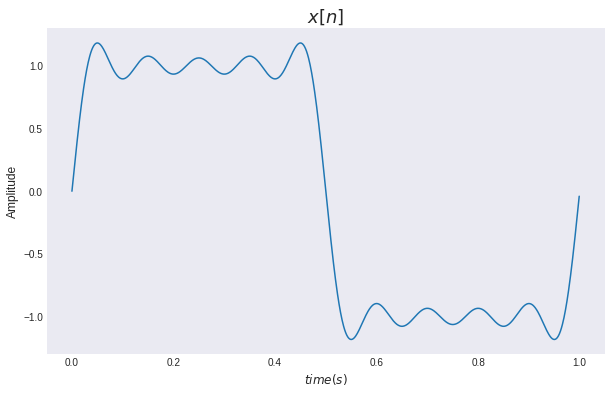

In [3]:
# Plot signal
from matplotlib.axis import XTick
# set figure style and size
plt.style.use('seaborn-dark')
fig = plt.figure(figsize=(10,6))

lin = plt.plot(t,S);
plt.xlabel('$time (s)$',fontdict={'fontsize':12})
plt.ylabel('Amplitude',fontdict={'fontsize':12})
plt.title('$ x[n]$',fontdict={'fontsize':18,'fontweight':'bold'})
fig.show()

## Next, we implement functions to compute DFT

In [4]:
# 2 loops DFT function
def DFT_2loops(x):
  N = len(x)
  Y = np.zeros(N,dtype = 'complex_')
  Y1 = np.zeros(N,dtype = 'complex_')
  Wn = np.exp(-1j*2*np.pi/N)
  for k in range(N):
    for n in range(N):
      Y1[n] = x[n]*Wn**(k*n)
    Y[k] = np.sum(Y1)
  return Y

In [5]:
# 1 loop DFT function
def DFT_1loops(x):
  N = len(x)
  Y = np.zeros(N,dtype = 'complex_')
  n = np.arange(0,N)
  Wn = np.exp(-1j*2*np.pi/N)**n
  for k in range(N):
    Wnk = Wn**k
    Y[k] = np.sum(x*Wnk)
  return Y

In [6]:
# next we implement DFT by matrix multiplication
def DFT_MtxMult(x):
  N = len(x) 
  DFT_Mtx = dft(N)
  Y = x@DFT_Mtx # same as np.matmul()
  return Y

In [7]:
# Here we show a function to get the one side spectrum computed with dft functions
def OneSideSpectrum(X):
  nfft  = len(X)
  X = np.abs(X)/nfft;
  Nf = nfft//2+1
  Y = X[0:Nf]
  Y[1:Nf] = 2*Y[1:Nf]
  return Y

In [8]:
# Execute dft by using 2 loops function
t0 =  process_time() 
Y = DFT_2loops(S);
t1 =  process_time() 
t_2loops = t1 - t0
print("Execution time {:,.4f} seconds".format(t_2loops))
Y_2loops = OneSideSpectrum(Y)

Execution time 3.9895 seconds


In [9]:
# Execute dft by using 1 loop function
t0 =  process_time() 
Y = DFT_1loops(S);
t1 =  process_time() 
t_1loop = t1 - t0
print("Execution time {:,.4f} seconds".format(t_1loop))
Y_1loops = OneSideSpectrum(Y)

Execution time 0.3579 seconds


In [10]:
# Execute dft by Matrix multiplication
t0 =  process_time() 
Y = DFT_MtxMult(S);
t1 =  process_time() 
t_MtxMult = t1 - t0
print("Execution time {:,.4f} seconds".format(t_MtxMult))
Y_MtxMult = OneSideSpectrum(Y)

Execution time 0.3362 seconds


In [11]:
# Execute dft by fft 
t0 =  process_time() 
Y = fft(S);
t1 =  process_time() 
t_fft = t1 - t0
print("Execution time {:,.4f} seconds".format(t_fft))
Y_fft = OneSideSpectrum(Y)

Execution time 0.0044 seconds


## Next we plot results

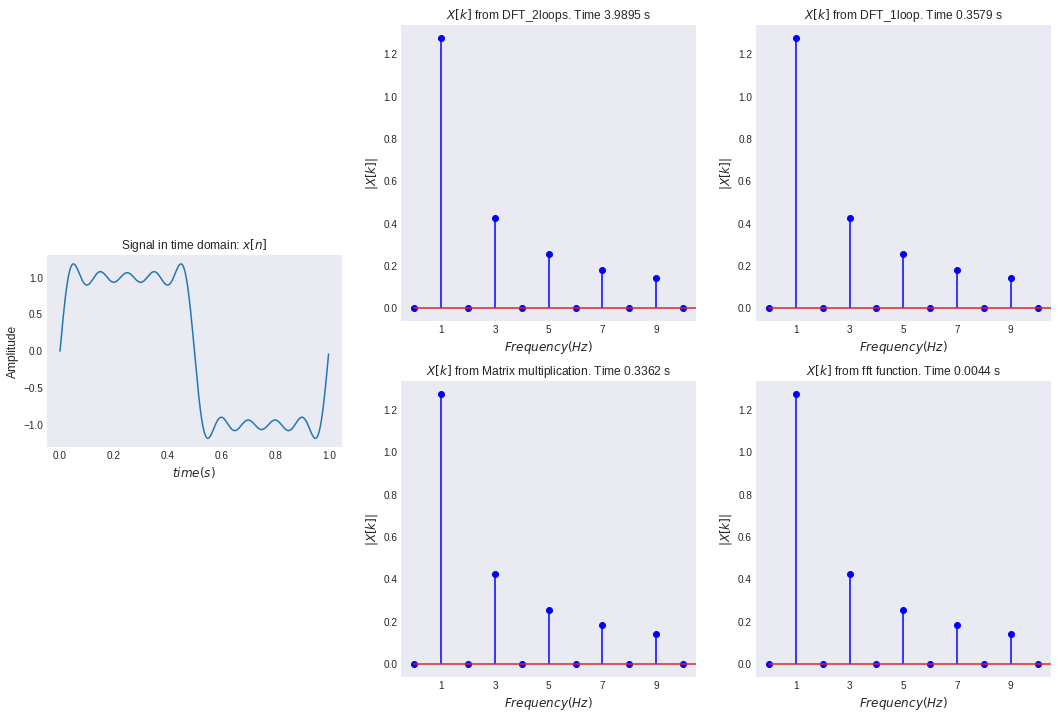

In [12]:
fvec = np.arange(0,fs/2+0.1);
fig = plt.figure(figsize=(18,12))

# plot results for 2 loops dft
plt.subplot2grid((2,3),(0, 1),1,1)
(markers,lines,baselines) = plt.stem(fvec,Y_2loops,linefmt='b-',markerfmt='bo',use_line_collection=True); #Stemplot
plt.xlabel('$Frequency (Hz) $',fontdict={'fontsize':12})
plt.ylabel('$|X[k]|$',fontdict={'fontsize':12})
str = 'Time {:,.4f} s'.format(t_2loops)
plt.title('$ X[k]$ from DFT_2loops. '+str,fontdict={'fontsize':12})
plt.xticks(Harm)
plt.xlim(-0.5,10.5)

# plot results for 1 loop dft
plt.subplot2grid((2,3),(0, 2),1,1)
(markers,lines,baselines) = plt.stem(fvec,Y_1loops,linefmt='b-',markerfmt='bo',use_line_collection=True); #Stemplot
plt.xlabel('$Frequency (Hz) $',fontdict={'fontsize':12})
plt.ylabel('$|X[k]|$',fontdict={'fontsize':12})
str = 'Time {:,.4f} s'.format(t_1loop)
plt.title('$ X[k]$ from DFT_1loop. '+str,fontdict={'fontsize':12})
plt.xticks(Harm)
plt.xlim(-0.5,10.5)

# plot results for Matrix multiplication dft
plt.subplot2grid((2,3),(1, 1),1,1)
(markers,lines,baselines) = plt.stem(fvec,Y_MtxMult,linefmt='b-',markerfmt='bo',use_line_collection=True); #Stemplot
plt.xlabel('$Frequency (Hz) $',fontdict={'fontsize':12})
plt.ylabel('$|X[k]|$',fontdict={'fontsize':12})
str = 'Time {:,.4f} s'.format(t_MtxMult)
plt.title('$ X[k]$ from Matrix multiplication. '+str,fontdict={'fontsize':12})
plt.xticks(Harm)
plt.xlim(-0.5,10.5)

# plot results for 1 loop dft
plt.subplot2grid((2,3),(1, 2),1,1)
(markers,lines,baselines) = plt.stem(fvec,Y_fft,linefmt='b-',markerfmt='bo',use_line_collection=True); #Stemplot
plt.xlabel('$Frequency (Hz) $',fontdict={'fontsize':12})
plt.ylabel('$|X[k]|$',fontdict={'fontsize':12})
str = 'Time {:,.4f} s'.format(t_fft)
plt.title('$ X[k]$ from fft function. '+str,fontdict={'fontsize':12})
plt.xticks(Harm)
plt.xlim(-0.5,10.5)

plt.subplot2grid((3,3),(1, 0),1,1)
lin = plt.plot(t,S);
plt.xlabel('$time (s)$',fontdict={'fontsize':12})
plt.ylabel('Amplitude',fontdict={'fontsize':12})
plt.title('Signal in time domain: $x[n]$',fontdict={'fontsize':12})
fig.show()

fig.show()

# Exercício prático
Análisis de um sinal de respiração
Dado o sinal de respiração contido num arquivo csv, é conhecido que a frequencia de amostragem é $f_s = 200 Hz$

a) Plote o sinal no domínio do tempo;

b) Determine a frequencia respiratória. Proponha algum método para calcular automáticamente o valor da frequencia respiratória;

c) Determine o ***Espectro de magnitude*** do sinal. Use para isto o cálculo da *DFT*;

d) Represente o o Espectro em escala linear e em escala logarítmica, identifique componentes espectrais que considere "importantes". Explique a origem destes componentes espectrais;

e) Adicione ruído aleatório ao sinal de respiração, repita as tarefas a - d;

f) faça as suas consideraçõs da utilidade do cálculo da *dft*.

In [1]:
# read data from drive
from google.colab import drive
drive.mount('/content/drive')

# now it's your turn to code :^) ... good luck


Mounted at /content/drive


In [4]:
# see: https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

url = 'https://drive.google.com/file/d/1V8jhLZSV07NEpzz8tDxDt1nQ8kMXCAO7/view?usp=sharing'


,"<!DOCTYPE html><html><head><meta name=""google"" content=""notranslate""><meta http-equiv=""X-UA-Compatible"" content=""IE=edge;""><style nonce=""pKNYclJv3LMeNCzOE95MeA"">@font-face{font-family:'Roboto';font-style:italic;font-weight:400;src:url(//fonts.gstatic.com/s/roboto/v18/KFOkCnqEu92Fr1Mu51xIIzc.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:300;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmSU5fBBc9.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:400;src:url(//fonts.gstatic.com/s/roboto/v18/KFOmCnqEu92Fr1Mu4mxP.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:500;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmEU9fBBc9.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:700;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmWUlfBBc9.ttf)format('truetype');}</style><meta name=""referrer"" content=""origin""><title>Respiration_Fs200Hz.csv - Google Drive</title><meta property=""og:title"" content=""Respiration_Fs200Hz.csv""><meta property=""og:type"" content=""article""><meta property=""og:site_name"" content=""Google Docs""><meta property=""og:url"" content=""https://drive.google.com/file/d/1V8jhLZSV07NEpzz8tDxDt1nQ8kMXCAO7/view?usp=sharing&amp;usp=embed_facebook""><link rel=""shortcut icon"" href=""https://ssl.gstatic.com/images/branding/product/1x/drive_2020q4_32dp.png""><link rel=""stylesheet"" href=""https://fonts.googleapis.com/css?family=Google+Sans:300",400,500,"700"" nonce=""pKNYclJv3LMeNCzOE95MeA""><link rel=""stylesheet"" href=""https://www.gstatic.com/_/apps-fileview/_/ss/k=apps-fileview.v.lMEp1MT94vA.L.X.O/am=AAI/d=0/rs=AO0039t9mOI0rdARSuVgfsNDZMGLM11MVg"" nonce=""pKNYclJv3LMeNCzOE95MeA""><script nonce=""4A2UsJq_EhnKbP44o3IJvw"">_docs_flag_initialData={""docs-ails"":""docs_cold""","docs-fwds:""docs_sdf""","docs-crs:""docs_crs_nfd""",docs-l2t:0,docs-shdn:0,"docs-tfh:""""",info_params:{},...,2.3,5.2,rw,271,0].7,[[null.2,null.199,null.200,"https://www.gstatic.com/og/_/js/k=og.qtm.en_US.F9GLv3vJthY.O/rt=j/m=qabr,q_dnp,qapid/exm=qaaw,qadd,qaid,qein,qhaw,qhbr,qhch,qhga,qhid,qhin,qhpr/d=1/ed=1/rs=AA2YrTudCw2XotoVCZRHW0V_ffgR5WCCig]]]]",};this.gbar_=this.gbar_||{};(function(_){var window=this;
0,try{,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,var ka,wa,za,Ea,Ga,Ha,Ma,Sa,Ta,Ua,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"_.ia=function(){return _.q(""Safari"")&&!(_.ha()...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,_.ma=function(a){var b=a.length;if(0<b){for(va...,d=0;d<b;d++)c[d]=a[d];return c}return[]};_.na=...,b){Object.isFrozen(a)||(qa?a[qa]|=b:void 0!==a...,{Rb:{value:b,configurable:!0,writable:!0,enumerable:!1}}))};_.sa=function(a,b){Object.isExtensible(a)&&(qa?a[qa]&&(a[qa]&=...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,_.ta=function(a){var b;qa?b=a[qa]:b=a.Rb;retur...,b){qa?a[qa]=b:void 0!==a.Rb?a.Rb=b:Object.defi...,{Rb:{value:b,configurable:!0,writable:!0,enumerable:!1}})};_.va=function(a){_.ra(a,1);return a};wa=function(a){_.ra(a,17);return a};_.xa=function(a){return a?!!(_.t...,"16)};za=function(a){return null!==a&&""object""=...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,(function(){var a=_.Td();if(_.E(a,18))Rj();else{var b=_.D(a,"19)||0;window.addEventListener(""load""",function(){window.setTimeout(Rj,b)})}})();,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,}catch(e){_._DumpException(e)},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,})(this.gbar_);,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,// Google Inc.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
